# Matematika ve financích - Projekt
## Viktor Procházka
### Problem 1 - Implement NPV and IRR functions
Net present value is defined as follows
$$ \text{NPV}= \sum_{t = 0}^n \frac{R_t}{(1+i)^t}  $$
where $R_t$ is cashflow at time $t$ and $i$ is the discount factor.

Internal rate of return is defined by the following property
$$ \sum_{t = 0}^n \frac{R_t}{(1+\text{IRR})^t} = 0 $$
where IRR is the internal rate of return.

Calculation of the NPV is straightforward as all we need to do is to evaluate the polynomial given by the definition. To do this calculation in $O(n)$ we use an algorithm know as Horner's method.

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt, exp

In [27]:
def NPV(discount_factor, cashflow_list):
    """Calculates the NPV for given discount factor and list of cashflow """
    
    npv_value = 0
    discount_quotient = 1/(1+discount_factor)
    
    for i in range(len(cashflow_list)):
        npv_value = npv_value * discount_quotient
        npv_value += cashflow_list[-i-1]
        
    return npv_value

def NPV_vectorized(discount_factor, cashflow_list):
    npv_factor = lambda i, r, t : r*1/(1+i)**t
    discount_vector = [discount_factor for x in cashflow_list]
    return sum(map(npv_factor, discount_vector, cashflow_list, range(len(cashflow_list))))

print(f'NPV to be calculated: {NPV(0.281,[-100, 39, 59, 55, 20])}')
print(f'NPV to be calculated: {NPV_vectorized(0.281,[-100, 39, 59, 55, 20])}')

NPV to be calculated: -0.00847859163846465
NPV to be calculated: -0.00847859163845488


Calculation of the IRR is not as easy, since it requires us to solve a polynomial equation. To do this, we will resort to using python's numerical library numpy with its integrated polynomial equation solver.

In [28]:
from numpy import roots as magical_polynomial_solver

def IRR(cashflow_list):
    """Calculates the NPV for given list of cashflow """
    """We first solve a polynomial equation and from all its solutions we select the real and nonnegative solution"""
    
    possible_solutions = magical_polynomial_solver(cashflow_list)
    solution = [np.real(x-1) for x in possible_solutions if (np.isreal(x)) and (np.real(x) > 0)][0]
    return solution
    

print(f'IRR to be calculated: {IRR([-100, 39, 59, 55, 20])}')

IRR to be calculated: 0.280948421159962


### Problem 2 - Monte Carlo Simulation of Asset Prices
We begin by setting the following constants and generating data

In [34]:
from numpy.random import normal as log_return_data_generator

sigma = 0.2 
T = 3 #years
n = T*365

dt = T/n
log_returns = log_return_data_generator(0, sigma*sqrt(dt), n)
cm_log_return = [sum(log_returns[0:x+1]) for x in range(n)]

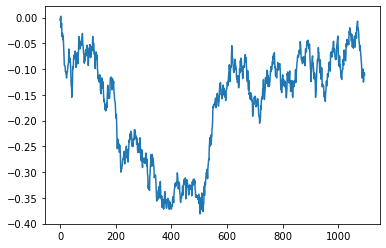

In [45]:
plt.plot(cm_log_return)
plt.show()

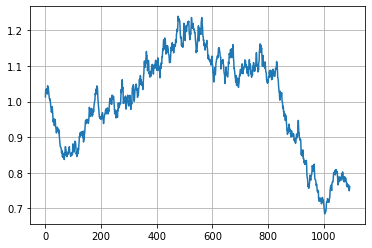

In [47]:
s = [exp(cm_log_return[t]) for t in range(n)] #tohle je divny, konzltovat
plt.clf()
plt.plot(s)
plt.grid(True)
plt.show()

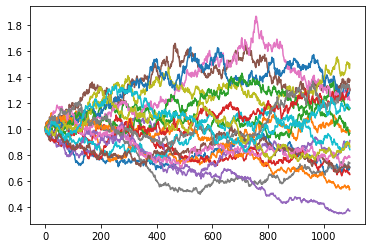

In [49]:
plt.clf()
for i in range(20):
    log_returns = log_return_data_generator(0, sigma*sqrt(dt), n)
    cm_log_return = [sum(log_returns[0:x+1]) for x in range(n)]
    s = [exp(cm_log_return[t]) for t in range(n)] #tohle je divny, konzltovat
    plt.plot(s)
plt.show()

### Problem 3 - Monte Carlo Simulation for Valuation


In [120]:
def coupon_count(bound, values):
    for i in range(len(values)-1, -1, -1):
        if values[i] >= bound:
            return i+1
    
    return 0

def find_first_index_over(bound, values):
    for i in range(len(values)):
        if values[i] >= bound:
            return i
        
    return len(values) -1


def fancy_contract(sigma):
    n = 6
    coupon = 2.5
    log_returns = log_return_data_generator(0, sigma, n)
    cm_log_return = [sum(log_returns[0:x+1]) for x in range(n)]
    values = [exp(x) for x in cm_log_return]
    values = values[:find_first_index_over(1, values) +1]
    number_of_coupons = coupon_count(0.8, values) 
    print(cm_log_return)
    print(values)
    print(number_of_coupons)
    if values[-1] >= 0.6:
        return 100 + number_of_coupons*coupon
    else:
        return 100*values[-1] + number_of_coupons*coupon
    


In [142]:
fancy_contract(0.3)

[-0.16915166188029812, -0.048164754037952576, -0.2517959970195175, -0.3469132848113557, -0.020080404945036046, 0.01677486364312373]
[0.8443808332897396, 0.9529767673725451, 0.7774033144865575, 0.7068666216726207, 0.980119863654689, 1.016916351708731]
6


115.0